<a href="https://colab.research.google.com/github/Sidi-med9/SidiMedMedLemine_C34646_2026_MachineLearning/blob/main/Mini_Projet_ML_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mini-Projet : Apprentissage Supervisé Linéaire (M1 IA) — 2026
# Notebook prêt pour Google Colab
# Partie 1: Régression Linéaire (Insurance) | Partie 2: Régression Logistique (Iris)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [3]:
# =========================
# PARTIE 1 — RÉGRESSION LINÉAIRE
# =========================

path = "/content/drive/MyDrive/dataset/Insurance.csv"

if not os.path.exists(path):
    raise FileNotFoundError("❌ Fichier introuvable. Vérifie le chemin : " + path)

df = pd.read_csv(path)
df.head()

,Age,Policy Term,PPT,Amount,Plan
0,33,20,10,30000,Nonpar
1,27,20,10,25000,Nonpar
2,36,20,10,30000,Nonpar
3,36,20,20,2000,Health
4,43,20,5,25000,Nonpar


In [4]:
# Vérification des colonnes
print("Colonnes :", df.columns.tolist())
df.info()

Colonnes : ['Age', 'Policy Term', 'PPT', 'Amount', 'Plan']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          100 non-null    int64 
 1   Policy Term  100 non-null    int64 
 2   PPT          100 non-null    int64 
 3   Amount       100 non-null    int64 
 4   Plan         100 non-null    object
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


In [5]:
# Nettoyage des noms de colonnes
df.columns = df.columns.str.strip()

# Conversion de la cible 'Amount' en numérique (si besoin)
print("Type de Amount avant:", df["Amount"].dtype)

df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")

# Suppression des lignes non convertibles
df = df.dropna(subset=["Amount"]).reset_index(drop=True)

print("Type de Amount après:", df["Amount"].dtype)
df.head()

Type de Amount avant: int64
Type de Amount après: int64


,Age,Policy Term,PPT,Amount,Plan
0,33,20,10,30000,Nonpar
1,27,20,10,25000,Nonpar
2,36,20,10,30000,Nonpar
3,36,20,20,2000,Health
4,43,20,5,25000,Nonpar


In [6]:
# Encodage des variables catégorielles
df_encoded = pd.get_dummies(df, drop_first=True)

# Définition de la variable cible (numérique)
target = "Amount"

if target not in df_encoded.columns:
    raise KeyError(f"❌ La colonne cible '{target}' n'existe pas après encodage. Colonnes: {df_encoded.columns.tolist()}")

y = df_encoded[target]
X = df_encoded.drop(target, axis=1)

print("✅ Cible:", target)
print("X shape:", X.shape, "| y shape:", y.shape)

df_encoded.head()

✅ Cible: Amount
X shape: (100, 6) | y shape: (100,)


,Age,Policy Term,PPT,Amount,Plan_Nonpar,Plan_Par,Plan_ULIP
0,33,20,10,30000,True,False,False
1,27,20,10,25000,True,False,False
2,36,20,10,30000,True,False,False
3,36,20,20,2000,False,False,False
4,43,20,5,25000,True,False,False


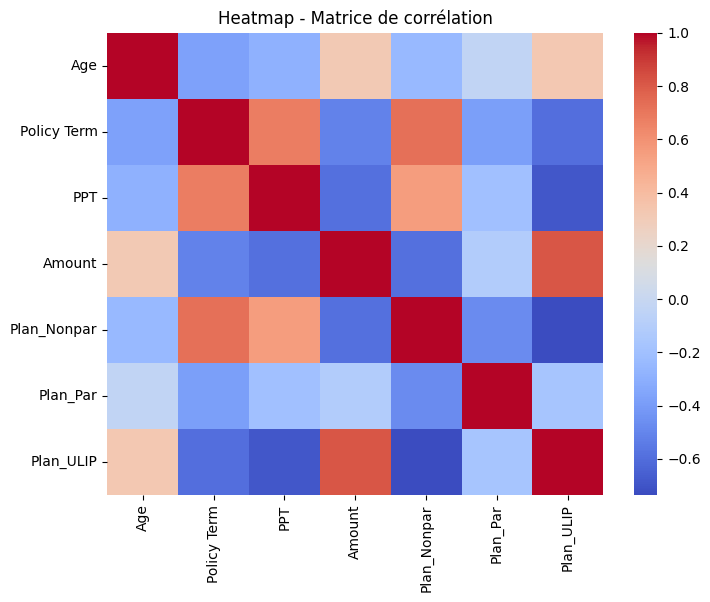

In [7]:
# Heatmap des corrélations (obligatoire)
plt.figure(figsize=(8,6))
sns.heatmap(df_encoded.corr(), cmap="coolwarm")
plt.title("Heatmap - Matrice de corrélation")
plt.show()

In [8]:
# Train / Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
# Entraînement Régression Linéaire
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Prédiction + Évaluation (MSE & R²)
y_pred = lin_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ MSE =", mse)
print("✅ R²  =", r2)

✅ MSE = 4191251165.338956
✅ R²  = 0.27864529661564374


In [11]:
# Interprétation des coefficients βi (importance des variables)
coef_df = pd.DataFrame({
    "Variable": X.columns,
    "Coefficient (βi)": lin_model.coef_
}).sort_values(by="Coefficient (βi)", ascending=False)

coef_df

,Variable,Coefficient (βi)
5,Plan_ULIP,424380.911776
4,Plan_Par,170155.161018
3,Plan_Nonpar,143424.580636
2,PPT,8559.495892
0,Age,1278.535238
1,Policy Term,-1515.667249


In [12]:
# =========================
# PARTIE 2 — RÉGRESSION LOGISTIQUE (IRIS)
# =========================

iris = load_iris()
X = iris.data
y = iris.target

# Transformation en binaire : Classe 0 vs Autres
y_binary = (y == 0).astype(int)
print("Classes:", np.unique(y_binary, return_counts=True))

Classes: (array([0, 1]), array([100,  50]))


In [13]:
# Normalisation (obligatoire)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Train / Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_binary, test_size=0.2, random_state=42
)

In [15]:
# Entraînement Régression Logistique
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Prédiction
y_pred = log_model.predict(X_test)

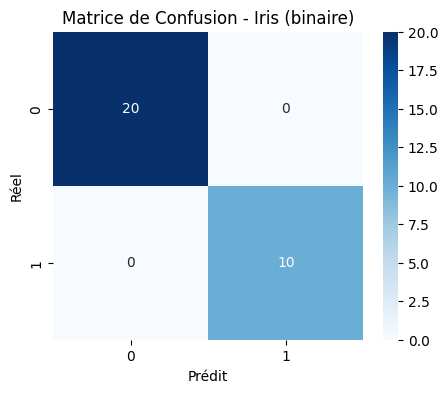

array([[20,  0],
       [ 0, 10]])

In [17]:
# Matrice de confusion (obligatoire)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de Confusion - Iris (binaire)")
plt.show()

cm

In [18]:
# Accuracy / Precision / Recall (obligatoires)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)

print("✅ Accuracy  =", acc)
print("✅ Precision =", prec)
print("✅ Recall    =", rec)

✅ Accuracy  = 1.0
✅ Precision = 1.0
✅ Recall    = 1.0
